- クラス分類
    - 散布図の生成
- 多クラス分類器構築
    - モデルの構築
    - チューニング
    - 予測と評価

In [1]:
#read library
import pandas as pd 
import numpy as np 
from matplotlib.colors import ListedColormap 
import matplotlib.pyplot as plt 
import seaborn as sns

### クラス分類

In [2]:
#sample data
np.random.seed(0)
X_xor = np.random.randn(300, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

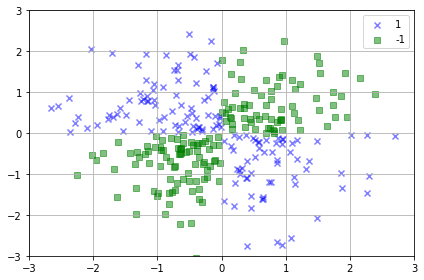

In [3]:
#scatter plot
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='blue',
            alpha = 0.5,
            marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='green',
            alpha = 0.5,
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
#read svm library
from sklearn.svm import SVC

直線で分離してみます

In [5]:
# build the line
svm = SVC(kernel='linear', C=1, random_state=0)
#learning
svm.fit(X_xor, y_xor)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

ハイパーパラメータのCは正則化項の強さです

In [6]:
#the function of the line
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):


    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('blue', 'green', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.5, c=cmap(idx),
                    marker=markers[idx], label=cl)

    X_test, y_test = X[test_idx, :], y[test_idx]

    plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=0.1,
                    linewidths=1,
                    marker='o',
                    s=55)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


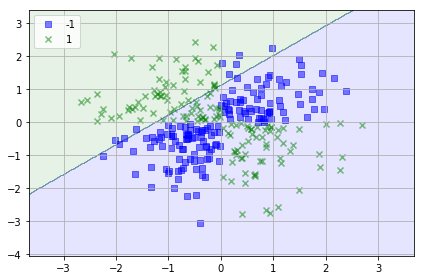

In [7]:
#plot the line
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

うまく分離できていないようです。（線形分離は難しい）
カーネルを使ってみましょう

####  多項式カーネル(非線形)

In [8]:
#nonlinear
svm = SVC(kernel='poly', C=1, degree = 3, coef0= 0, random_state=0)
#learning
svm.fit(X_xor, y_xor)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

多項式カーネルで調整すべきハイパーパラメータは  
degree:次元数  
coef0: 切片  
です。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


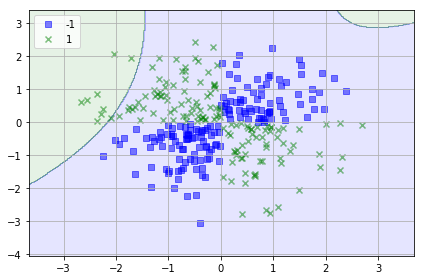

In [9]:
#plot the line
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

少し曲線部分が現れたのが分かります

####  シグモイドカーネル

In [10]:
#sigmoid
svm = SVC(kernel='sigmoid', C=1, gamma=10, coef0= 10, random_state=0)
#learning
svm.fit(X_xor, y_xor)

SVC(C=1, cache_size=200, class_weight=None, coef0=10,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

シグモイドカーネルで調整すべきハイパーパラメータは  
gamma:係数の値   
coef0: 切片  
です。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


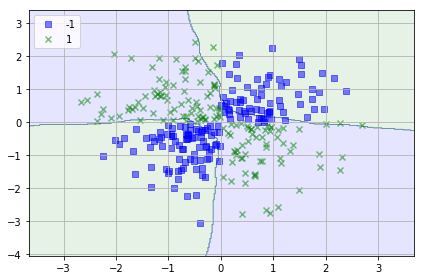

In [11]:
#plot the line
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

分類できているように見えます

####  ガウシアンカーネル

In [12]:
#kernel = rbf
svm = SVC(kernel='rbf', C=1, gamma=10, random_state=0)
#learning
svm.fit(X_xor, y_xor)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

ガウシアンカーネルで調整すべきハイパーパラメータは  
gamma:-1/2σ^2の値   
です。

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


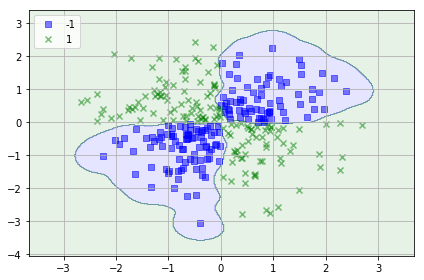

In [13]:
#plot the line
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

100%分類できているように見えます

### 多クラス分類器構築

In [14]:
#read data iris
from sklearn.datasets import load_iris 
iris = load_iris() 

In [15]:
#to dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['iris name'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
#class number
iris_df["iris name"].nunique()

3

***説明変数の意味***  
  
・sepal length (cm):がく片の長さ  
・sepal width (cm):がく片の幅  
・petal length (cm):花びらの長さ  
・petal width (cm):花びらの幅	  
・iris name:花の種類  

**<span style="color: red; ">説明変数を用いて花の名前(iris name)を分類するモデルを構築していきます**

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


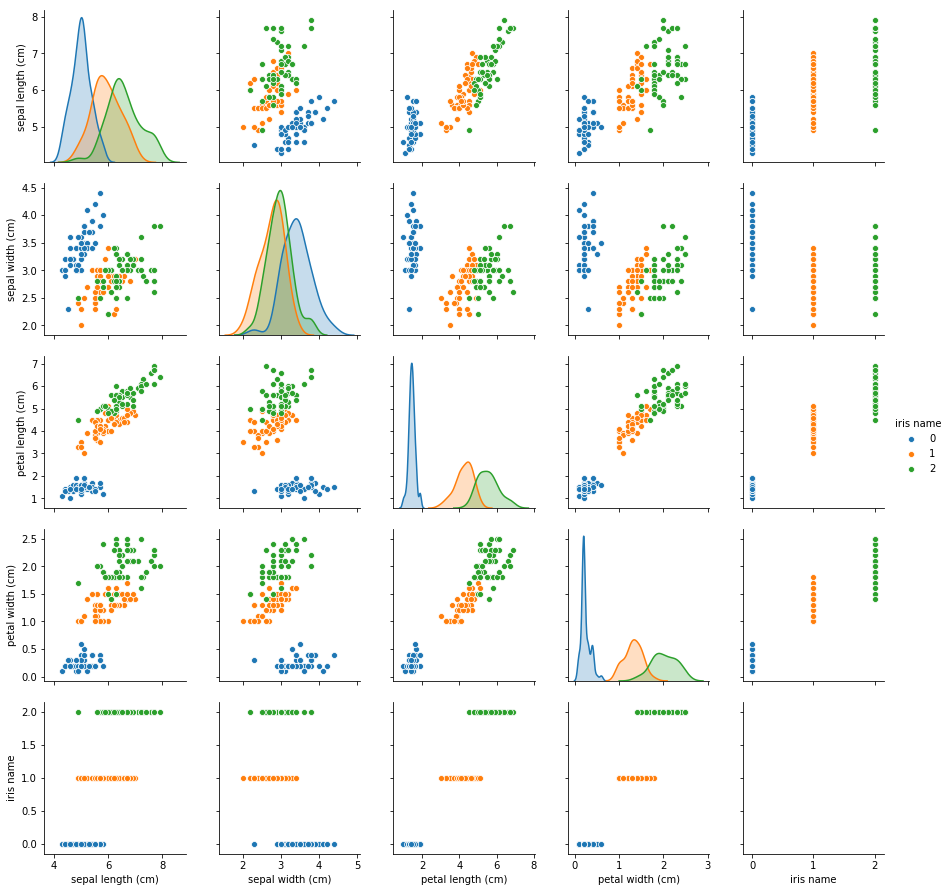

In [17]:
#plot
sns.pairplot(iris_df, hue="iris name") #iris nameごとに説明変数を描画
plt.show()

花の名前ごとに説明変数が異なる様子が分かります

***モデル構築の準備***

In [18]:
#the library of split the train data and test data
from sklearn.model_selection import train_test_split 

# X
X = iris_df.drop("iris name", axis = 1)

# standard
from sklearn import preprocessing 
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)

# Y
Y = iris_df["iris name"]

#split train data and test data to 8:2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

***ハイパーパラメータの探索***  
ハイパーパラメータをグリッドサーチ交差検証を行って決めます

In [19]:
#hyper parameter
tuned_parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01 , 0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]

In [20]:
#the library of the gridsearch
from sklearn.model_selection import GridSearchCV #グリッドサーチ交差検証してくれる関数

In [21]:
#grid reasearch
clf_cv = GridSearchCV(
             SVC(), 
             tuned_parameters, 
             cv=3, 
             scoring='f1_weighted', 
             verbose=2)

clf_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 52 candidates, totalling 156 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=100, kernel=linear ............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and 


[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ................... C=1000, gamma=0.01, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .................. C=1000, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

[CV] ........ C=100, degree=3, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, degree=3, gamma=0.001, kernel=poly .......................
[CV] ........ C=100, degree=3, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, degree=3, gamma=0.001, kernel=poly .......................
[CV] ........ C=100, degree=3, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, degree=3, gamma=0.0001, kernel=poly ......................
[CV] ....... C=100, degree=3, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, degree=3, gamma=0.0001, kernel=poly ......................
[CV] ....... C=100, degree=3, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, degree=3, gamma=0.0001, kernel=poly ......................
[CV] ....... C=100, degree=3, gamma=0.0001, kernel=poly, total=   0.0s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................
[CV] ........ C=100, degree=4, gamma=0.001, kernel=poly, total=   0.0s
[CV] C=100, degree=4, gamma=0.001, kernel=poly .......................
[CV] .

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\c

[CV] .............. C=100, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] .............. C=100, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=1000, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=1000, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=sigmoid .............................
[CV] .............. C=1000, gamma=0.001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=1000, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] ............. C=1000, gamma=0.0001, kernel=sigmoid, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV] .

[Parallel(n_jobs=1)]: Done 156 out of 156 | elapsed:    0.5s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [22]:
#the result of crossvalidtion
clf_cv.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.00132648, 0.00100001, 0.00166504, 0.00199739, 0.00099913,
        0.00133173, 0.00166607, 0.00166504, 0.0009977 , 0.00166639,
        0.00099889, 0.00099874, 0.0016648 , 0.00099881, 0.00099826,
        0.00099897, 0.00166543, 0.00099881, 0.00133204, 0.00199866,
        0.00099905, 0.00133212, 0.00166543, 0.00099874, 0.00102393,
        0.00133061, 0.00099889, 0.00099874, 0.0009985 , 0.0009981 ,
        0.00133181, 0.00099905, 0.00133189, 0.00133212, 0.00133236,
        0.00166496, 0.00099826, 0.00099675, 0.00099921, 0.00099905,
        0.0009985 , 0.00099897, 0.00133236, 0.00133197, 0.00199779,
        0.00099913, 0.00133181, 0.00099858, 0.00099977, 0.00133165,
        0.00099874, 0.00166472]),
 'std_fit_time': array([4.76205978e-04, 9.60274217e-07, 4.71145731e-04, 8.15172062e-04,
        7.86741172e-07, 4.70415116e-04, 9.43077902e-04, 9.42122679e-04,
        4.15848905e-06, 4.72102595e-04, 1.12391596e-07, 1.94667955e-07,
        4.70976993e-04, 5.61957980e-0

In [23]:
#the best parameters
clf_cv.best_params_

{'C': 100, 'kernel': 'linear'}

***学習***

In [24]:
#use the best parameter learning
clf = SVC(**clf_cv.best_params_, random_state=0)
clf.fit(X_train, Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

***予測と評価***

In [25]:
#evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score 

In [26]:
#predict
pred = clf.predict(X_test) #予測
print("混同行列\n", confusion_matrix(Y_test, pred))
print("分類精度\n", classification_report(Y_test, pred))
print("全体の正解率\n", accuracy_score(Y_test, pred))

混同行列
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
分類精度
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

全体の正解率
 1.0


混同行列より誤分類が１つのみあるみたいですが高精度です。  
グリッドサーチ交差検証の結果も同精度のため汎化性能もあるようです

### 回帰モデル構築

In [27]:
#read the data
from sklearn.datasets import load_boston
boston = load_boston() 

In [28]:
import pandas as pd 

#to dataframe
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**<span style="color: red; ">CRIMからLSTATまでの変数(説明変数)を用いてMEDV(住宅価格の中央値)を予測するモデルを構築します**

***モデル構築の準備***

In [29]:
#split the data

# X
X = boston_df.drop("MEDV", axis = 1)

# standard
sc_x=preprocessing.StandardScaler()
sc_x.fit(X)
X=sc_x.transform(X)

# Y
Y = np.log(boston_df["MEDV"]) #logをとって分散を小さくする小技


##split train data and test data to 8:2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

***ハイパーパラメータ探索***

In [30]:
#tune parameters
tuned_parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]},
    {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}
    ]

In [31]:
#the model of svm
from sklearn.svm import SVR

In [32]:
#gridsearch
clf_cv = GridSearchCV(
             SVR(), 
             tuned_parameters, 
             cv=3, 
             scoring='r2', 
             verbose=2)

clf_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 52 candidates, totalling 156 fits
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ............................... C=1, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............................. C=10, kernel=linear, total=   0.1s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.0s
[CV] C=10, kernel=linear .............................................
[CV] .............................. C=10, kernel=linear, total=   0.1s
[CV] C=100, kernel=linear ............................................
[CV] ............................. C=100, kernel=linear, total=   1.1s
[CV] C=100, kernel=linear ............................................
[CV] ............................. C=100, kernel=linear, total=   1.2s
[CV] C=100, kernel=linear ............................................
[CV] ............................. C=100, kernel=linear, total=   1.1s
[CV] C=1000, kernel=linear ...........................................
[CV] ............................ C=1000, kernel=linear, total=   8.1s
[CV] C=1000, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done 156 out of 156 | elapsed:   32.3s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': [0.001, 0.0001]}, {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid'], 'gamma': [0.001, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [33]:
#the result of cross-validation
clf_cv.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([1.73152288e-02, 1.61347946e-01, 1.21858295e+00, 8.95145671e+00,
        4.00098165e-03, 3.33158175e-03, 3.00248464e-03, 3.32959493e-03,
        6.33589427e-03, 4.67085838e-03, 3.33054860e-03, 2.33125687e-03,
        8.32486153e-03, 1.73950195e-02, 7.68351555e-03, 2.99572945e-03,
        1.33191744e-02, 7.56945610e-02, 2.03118324e-02, 6.99234009e-03,
        2.99715996e-03, 2.33062108e-03, 2.99684207e-03, 2.66440709e-03,
        2.33173370e-03, 3.32824389e-03, 3.66322200e-03, 2.33085950e-03,
        2.66369184e-03, 3.32975388e-03, 4.99407450e-03, 3.32959493e-03,
        2.99771627e-03, 2.66464551e-03, 3.33078702e-03, 2.99723943e-03,
        2.99708049e-03, 2.99676259e-03, 3.66250674e-03, 2.66385078e-03,
        2.66440709e-03, 2.66400973e-03, 2.66408920e-03, 2.33125687e-03,
        2.99620628e-03, 3.32887967e-03, 2.66353289e-03, 2.99700101e-03,
        5.99471728e-03, 3.66290410e-03, 1.66491667e-02, 5.66109022e-03]),
 'std_fit_time': array([1.69808491e-03, 3.761

In [34]:
#the best parameters
clf_cv.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

***学習***

In [35]:
#learning by the best parameter
clf = SVR(**clf_cv.best_params_)
clf.fit(X_train, Y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

***予測と評価***

In [36]:
# read the funtion of MSE and R^2
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 

In [37]:
#predict and evalution MSE and R^2
pred = clf.predict(X_test) 
print("MSE: ", mean_squared_error(np.exp(Y_test), np.exp(pred)) )
print("R^2 :",r2_score(np.exp(Y_test), np.exp(pred))) 

MSE:  21.296856051573602
R^2 : 0.7384592373754773
